In [1]:
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
from tqdm import tqdm
from PIL import Image
Path = '/content/drive/MyDrive/shape_recognition/shapes/'
image = []
label = []
a = 0
for dir in os.listdir(Path):
  for item in tqdm(os.listdir(Path + dir)):
    Img_O = Image.open(Path + dir +'/' + item).resize((60, 60))
    image.append(np.array(Img_O).flatten()/255.0)
    label.append(a)
  a += 1



100%|██████████| 3720/3720 [01:42<00:00, 36.18it/s] 


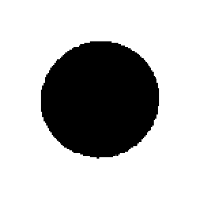

In [4]:
Image.open(Path + dir + '/' + item)

In [5]:
from keras.utils import to_categorical
y = to_categorical(label)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(image, y, test_size= 0.2)

In [8]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [9]:
y_train

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [10]:
x_train

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [12]:
model = Sequential()
model.add(Dense(64, 'relu', input_shape = (x_train.shape[1],)))
model.add(Dense(128, 'relu'))
model.add(Dense(4, 'softmax'))

In [13]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = 'accuracy')

In [14]:
history = model.fit(x_train, y_train, batch_size = 64, epochs = 8, validation_split = 0.2)

Epoch 1/8
150/150 [==============================] - 3s 16ms/step - loss: 0.2784 - accuracy: 0.9032 - val_loss: 0.0473 - val_accuracy: 0.9891
Epoch 2/8
150/150 [==============================] - 2s 13ms/step - loss: 0.0383 - accuracy: 0.9923 - val_loss: 0.0245 - val_accuracy: 0.9946
Epoch 3/8
150/150 [==============================] - 1s 9ms/step - loss: 0.0260 - accuracy: 0.9934 - val_loss: 0.0207 - val_accuracy: 0.9950
Epoch 4/8
150/150 [==============================] - 1s 8ms/step - loss: 0.0194 - accuracy: 0.9946 - val_loss: 0.0107 - val_accuracy: 0.9975
Epoch 5/8
150/150 [==============================] - 1s 8ms/step - loss: 0.0118 - accuracy: 0.9971 - val_loss: 0.0202 - val_accuracy: 0.9950
Epoch 6/8
150/150 [==============================] - 1s 7ms/step - loss: 0.0094 - accuracy: 0.9973 - val_loss: 0.0063 - val_accuracy: 0.9983
Epoch 7/8
150/150 [==============================] - 1s 7ms/step - loss: 0.0056 - accuracy: 0.9987 - val_loss: 0.0048 - val_accuracy: 0.9987
Epoch 8/8
1

In [15]:
import matplotlib.pyplot as plt
def plot_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train', 'Validation'], loc = 'upper right')
  plt.show()

In [16]:
def plot_accuracy(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train', 'Validation'], loc ='upper left')
  plt.show()

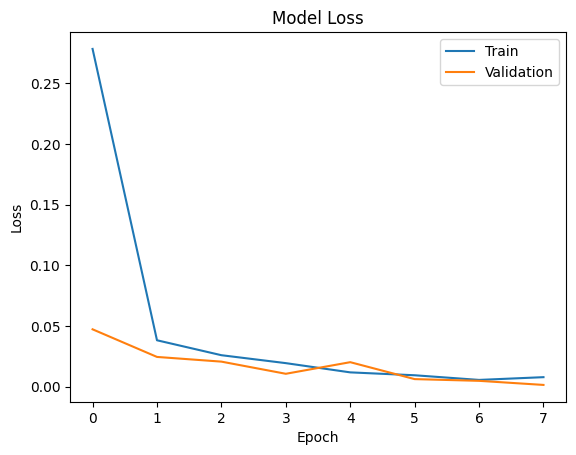

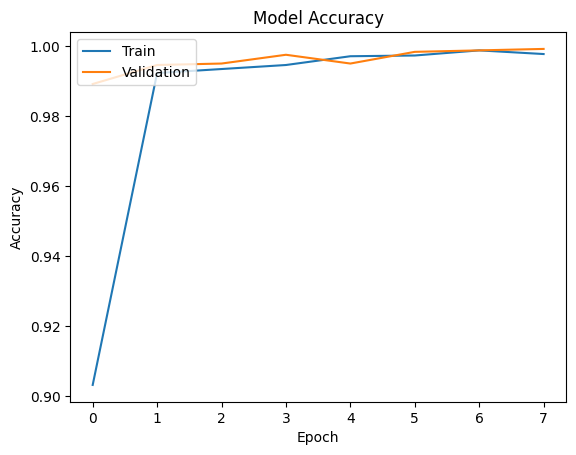

In [17]:
plot_loss(history)
plot_accuracy(history)

In [18]:
predictions = model.predict(x_test)

94/94 [==============================] - 0s 3ms/step


In [19]:
predicted_labels = [np.argmax(i) for i in predictions]

In [20]:
import tensorflow as tf
y_test_integer_labels = tf.argmax(y_test, axis = 1)

In [21]:
cm = tf.math.confusion_matrix(labels = y_test_integer_labels, predictions = predicted_labels)

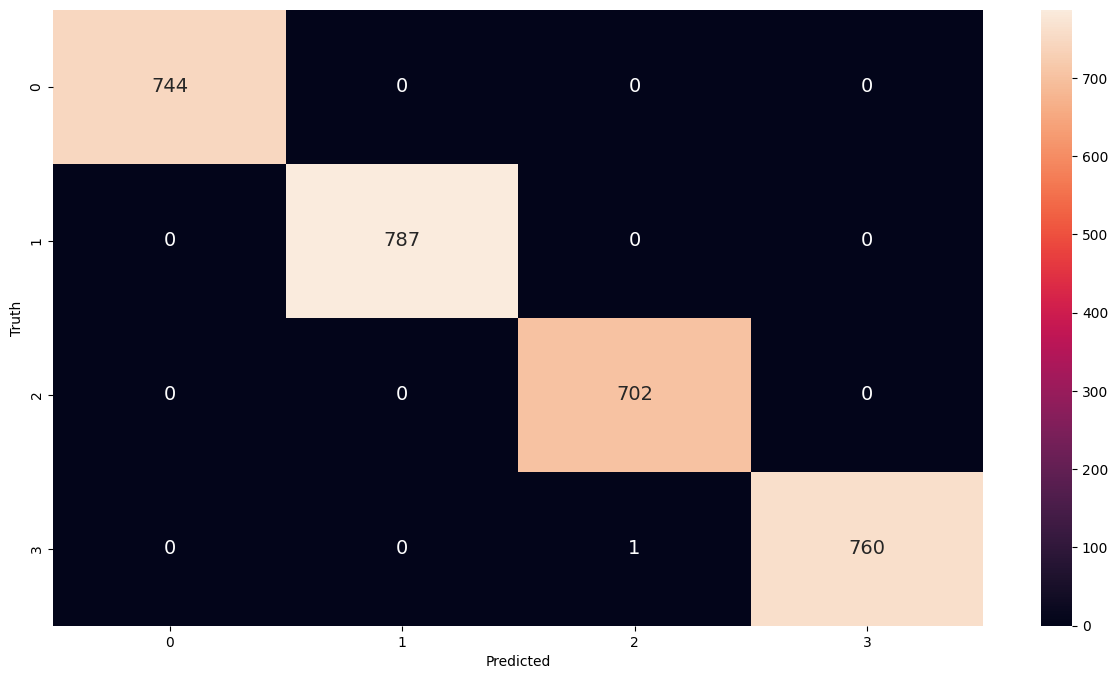

In [22]:
import seaborn as sns
plt.figure(figsize=[15, 8])
sns.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 14})
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()